In [1]:
import sys
import os
import importlib
import gc
import glob
import random
from itertools import combinations

import numpy as np
import scipy
import sklearn
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

import pyemma
import msmtools
import mdtraj as md

import ivac
import extq

In [2]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting

In [3]:
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots
cm_seq = sns.cubehelix_palette(
    start=0, rot=-0.70, gamma=0.40, light=0.9, dark=0.1, as_cmap=True, reverse=True
)
cm_seq2 = sns.cubehelix_palette(
    start=0, rot=-0.70, gamma=0.40, light=0.8, dark=0.1, as_cmap=True, reverse=False
)
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("", colors)

In [4]:
from joblib import Parallel, delayed
from multiprocessing import cpu_count

In [5]:
n_jobs = cpu_count()

In [6]:
topfile = "../../civsd-pro.psf"

In [7]:
files = []
remove = {1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
}
for i in range(295):
    if (i + 1000) not in remove:
        files.append(f"/project/dinner/scguo/anton-old/xtc1000ns/civsd-{i}.xtc")
for i in range(3, 63):
    files.append(f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc")

In [8]:
files

['/project/dinner/scguo/anton-old/xtc1000ns/civsd-0.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-1.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-2.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-3.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-4.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-5.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-6.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-7.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-8.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-9.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-10.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-11.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-12.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-13.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-14.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-15.xtc',
 '/project/dinner/scguo/anton-old/xtc1000ns/civsd-16.xtc',
 '/proj

In [8]:
traj = md.load(files[0], top=topfile)

In [31]:
com = md.compute_center_of_mass(traj, "residue 161 and sidechain and not name CB and not type H")

In [42]:
rca = traj.atom_slice(traj.top.select("residue 226 and name CZ")).xyz
dist = np.linalg.norm(com - rca.squeeze(), axis=-1)

In [43]:
dist.shape

(10000,)

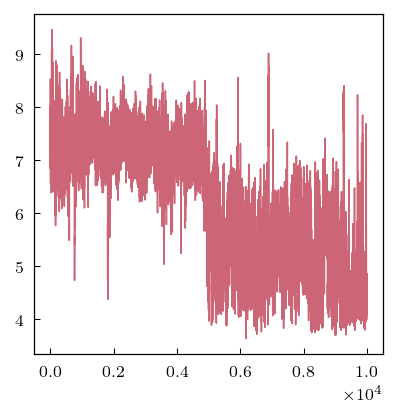

In [45]:
plt.plot(dist * 10)

In [7]:
def compute_rf(trajfile, r_id):
    traj = md.load(trajfile, top=topfile)
    com = md.compute_center_of_mass(traj, "residue 161 and sidechain and not name CB and not type H")
    rcz = traj.atom_slice(traj.top.select(f"residue {r_id} and name CZ")).xyz
    return np.linalg.norm(com - rcz.squeeze(), axis=-1)

In [10]:
# r226f = Parallel(n_jobs=n_jobs, verbose=40)(
#     delayed(compute_rf)(f, 226) for f in files)
r223f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 223) for f in files)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:    5.5s
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:    5.8s
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:    5.9s
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:    5.9s
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:    6.0s
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:    6.0s
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:    6.1s
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:    6.1s
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:    6.1s
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:    6.1s
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:    6.2s
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:    6.2s
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:    6.3s
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [11]:
r229f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 229) for f in files)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:    2.2s
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:    2.2s
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:    2.2s
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:    2.3s
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:    2.3s
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(n_jobs=48)]: Do

(array([1.79872e+05, 6.94743e+05, 3.64368e+05, 3.24893e+05, 4.57310e+05,
        6.03976e+05, 2.40365e+05, 1.35406e+05, 1.06868e+05, 1.03476e+05,
        9.25380e+04, 7.67190e+04, 5.25930e+04, 4.45470e+04, 6.01380e+04,
        4.52460e+04, 1.42520e+04, 2.37400e+03, 3.34000e+02, 4.20000e+01]),
 array([0.31387903, 0.41171199, 0.50954495, 0.60737791, 0.70521088,
        0.80304384, 0.9008768 , 0.99870976, 1.09654272, 1.19437568,
        1.29220865, 1.39004161, 1.48787457, 1.58570753, 1.68354049,
        1.78137345, 1.87920642, 1.97703938, 2.07487234, 2.1727053 ,
        2.27053826]),
 <BarContainer object of 20 artists>)

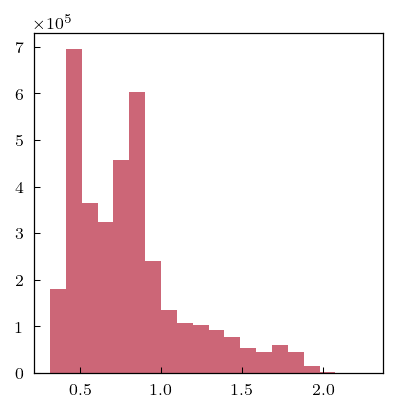

In [101]:
plt.hist(np.concatenate(r226f), bins=20)

In [111]:
for i in np.argsort(np.concatenate(r226f))[:-10:-1]:
    print(util.anton_frame(i))
    print(np.concatenate(r226f)[i])

(87, 3207)
2.2705382627451596
(98, 840)
2.2591786316731794
(87, 2293)
2.24896140229878
(87, 3153)
2.2434967747379893
(87, 3138)
2.235771705649439
(98, 820)
2.2331421748677713
(98, 1021)
2.217446606640469
(87, 3245)
2.2169849101824672
(87, 3225)
2.21641899725286


In [112]:
np.save("../../data/raw_feat/r226f161.npy", r226f)

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [12]:
print(len(r223f), len(r229f))

297 297


In [13]:
np.save("../../data/raw_feat/r223f161.npy", r223f[:237])
np.save("../../data/raw_feat/r223f161_anton2.npy", r223f[237:])
np.save("../../data/raw_feat/r229f161.npy", r229f[:237])
np.save("../../data/raw_feat/r229f161_anton2.npy", r229f[237:])

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [14]:
r226f = np.load("../../data/raw_feat/r226f161.npy", allow_pickle=True)

In [15]:
np.save("../../data/raw_feat/r226f161.npy", r226f[:237])
np.save("../../data/raw_feat/r226f161_anton2.npy", r226f[237:])

In [13]:
r226f = list(np.load("../../data/raw_feat/r226f161.npy", allow_pickle=True))
r226f.extend(np.load("../../data/raw_feat/r226f161_anton2.npy", allow_pickle=True))

In [21]:
r223f = list(np.load("../../data/raw_feat/r223f161.npy", allow_pickle=True))
r223f.extend(np.load("../../data/raw_feat/r223f161_anton2.npy", allow_pickle=True))
r229f = list(np.load("../../data/raw_feat/r229f161.npy", allow_pickle=True))
r229f.extend(np.load("../../data/raw_feat/r229f161_anton2.npy", allow_pickle=True))

## New 3.17.22

In [34]:
files = [f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc" for i in range(63, 82)]
r223f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 223) for f in files)
r226f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 226) for f in files)
r229f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 229) for f in files)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:    4.4s
[Parallel(n_jobs=48)]: Done   2 out of  19 | elapsed:    4.4s remaining:   37.4s
[Parallel(n_jobs=48)]: Done   3 out of  19 | elapsed:    4.6s remaining:   24.5s
[Parallel(n_jobs=48)]: Done   4 out of  19 | elapsed:    4.8s remaining:   17.9s
[Parallel(n_jobs=48)]: Done   5 out of  19 | elapsed:    5.0s remaining:   14.0s
[Parallel(n_jobs=48)]: Done   6 out of  19 | elapsed:    5.2s remaining:   11.3s
[Parallel(n_jobs=48)]: Done   7 out of  19 | elapsed:    5.6s remaining:    9.6s
[Parallel(n_jobs=48)]: Done   8 out of  19 | elapsed:    5.7s remaining:    7.8s
[Parallel(n_jobs=48)]: Done   9 out of  19 | elapsed:    5.8s remaining:    6.4s
[Parallel(n_jobs=48)]: Done  10 out of  19 | elapsed:    5.9s remaining:    5.3s
[Parallel(n_jobs=48)]: Done  11 out of  19 | elapsed:    5.9s remaining:    4.3s
[Parallel(n_jobs=48)]: Done  12 out of  19 | elapse

In [35]:
r223f_old = list(np.load("../../data/raw_feat/r223f161_anton2.npy", allow_pickle=True))
r223f_old.extend(r223f)
r226f_old = list(np.load("../../data/raw_feat/r226f161_anton2.npy", allow_pickle=True))
r226f_old.extend(r226f)
r229f_old = list(np.load("../../data/raw_feat/r229f161_anton2.npy", allow_pickle=True))
r229f_old.extend(r229f)

In [38]:
rf161 = np.stack((np.concatenate(r223f_old), np.concatenate(r226f_old), np.concatenate(r229f_old)), axis=-1)
traj_inds = util.split_indices(r223f_old)
rf161 = np.split(rf161, traj_inds)
print(len(rf161), rf161[0].shape)

79 (10001, 3)


In [39]:
np.save("../../data/raw_feat/rf161_anton2.npy", rf161)

## New 3.25.22

In [10]:
files = [f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc" for i in range(83, 119)]
r223f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 223) for f in files)
r226f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 226) for f in files)
r229f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 229) for f in files)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=48)]: Done   2 out of  36 | elapsed:    5.5s remaining:  1.6min
[Parallel(n_jobs=48)]: Done   3 out of  36 | elapsed:    5.5s remaining:  1.0min
[Parallel(n_jobs=48)]: Done   4 out of  36 | elapsed:    5.5s remaining:   44.0s
[Parallel(n_jobs=48)]: Done   5 out of  36 | elapsed:    5.7s remaining:   35.5s
[Parallel(n_jobs=48)]: Done   6 out of  36 | elapsed:    5.7s remaining:   28.7s
[Parallel(n_jobs=48)]: Done   7 out of  36 | elapsed:    5.8s remaining:   23.9s
[Parallel(n_jobs=48)]: Done   8 out of  36 | elapsed:    5.8s remaining:   20.2s
[Parallel(n_jobs=48)]: Done   9 out of  36 | elapsed:    5.8s remaining:   17.5s
[Parallel(n_jobs=48)]: Done  10 out of  36 | elapsed:    5.9s remaining:   15.3s
[Parallel(n_jobs=48)]: Done  11 out of  36 | elapsed:    5.9s remaining:   13.4s
[Parallel(n_jobs=48)]: Done  12 out of  36 | elapse

In [15]:
rf161 = np.load("../../data/raw_feat/rf161_anton2.npy")
print(rf161.shape)

(79, 10001, 3)


In [19]:
len(r223f)
r223f[0].shape

(10001,)

In [21]:
rf161_new = np.stack((r223f, r226f, r229f), axis=-1)
print(rf161_new.shape)

(36, 10001, 3)


In [23]:
rf161 = np.vstack((rf161, rf161_new))
print(rf161.shape)

(115, 10001, 3)


In [24]:
np.save("../../data/raw_feat/rf161_anton2.npy", rf161)

## 10.24.22

In [11]:
n_jobs = 16
files = [f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc" for i in range(119, 152)]
r223f = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(compute_rf)(f, 223) for f in files)
r226f = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(compute_rf)(f, 226) for f in files)
r229f = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(compute_rf)(f, 229) for f in files)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 tasks      | elapsed:   10.5s
[Parallel(n_jobs=16)]: Done   2 tasks      | elapsed:   10.8s
[Parallel(n_jobs=16)]: Done   4 out of  33 | elapsed:   11.0s remaining:  1.3min
[Parallel(n_jobs=16)]: Done   6 out of  33 | elapsed:   11.1s remaining:   49.8s
[Parallel(n_jobs=16)]: Done   8 out of  33 | elapsed:   11.2s remaining:   34.8s
[Parallel(n_jobs=16)]: Done  10 out of  33 | elapsed:   11.7s remaining:   26.9s
[Parallel(n_jobs=16)]: Done  12 out of  33 | elapsed:   12.3s remaining:   21.4s
[Parallel(n_jobs=16)]: Done  14 out of  33 | elapsed:   13.6s remaining:   18.4s
[Parallel(n_jobs=16)]: Done  16 out of  33 | elapsed:   14.1s remaining:   15.0s
[Parallel(n_jobs=16)]: Done  18 out of  33 | elapsed:   17.0s remaining:   14.2s
[Parallel(n_jobs=16)]: Done  20 out of  33 | elapsed:   17.3s remaining:   11.2s
[Parallel(n_jobs=16)]: Done  22 out of  33 | elapsed:   17.3s remainin

In [12]:
rf161 = np.load("../../data/raw_feat/rf161_anton2.npy")
print(rf161.shape)

(115, 10001, 3)


In [13]:
len(r223f)
r223f[0].shape

(10001,)

In [14]:
rf161_new = np.stack((r223f, r226f, r229f), axis=-1)
print(rf161_new.shape)

(33, 10001, 3)


In [15]:
rf161 = np.vstack((rf161, rf161_new))
print(rf161.shape)

(148, 10001, 3)


In [16]:
np.save("../../data/raw_feat/rf161_anton2.npy", rf161)

## New 11.25.22

In [8]:
files = [f"/project/dinner/scguo/ci-vsd/anton2/prot/civsd.prot.{i}.xtc" for i in range(152, 188)]
r223f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 223) for f in files)
r226f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 226) for f in files)
r229f = Parallel(n_jobs=n_jobs, verbose=40)(
    delayed(compute_rf)(f, 229) for f in files)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:    6.2s
[Parallel(n_jobs=48)]: Done   2 out of  36 | elapsed:    6.2s remaining:  1.8min
[Parallel(n_jobs=48)]: Done   3 out of  36 | elapsed:    6.3s remaining:  1.1min
[Parallel(n_jobs=48)]: Done   4 out of  36 | elapsed:    6.3s remaining:   50.6s
[Parallel(n_jobs=48)]: Done   5 out of  36 | elapsed:    6.3s remaining:   39.3s
[Parallel(n_jobs=48)]: Done   6 out of  36 | elapsed:    6.4s remaining:   31.9s
[Parallel(n_jobs=48)]: Done   7 out of  36 | elapsed:    6.5s remaining:   26.8s
[Parallel(n_jobs=48)]: Done   8 out of  36 | elapsed:    6.5s remaining:   22.7s
[Parallel(n_jobs=48)]: Done   9 out of  36 | elapsed:    6.6s remaining:   19.7s
[Parallel(n_jobs=48)]: Done  10 out of  36 | elapsed:    6.6s remaining:   17.1s
[Parallel(n_jobs=48)]: Done  11 out of  36 | elapsed:    6.6s remaining:   15.0s
[Parallel(n_jobs=48)]: Done  12 out of  36 | elapse

In [11]:
rf161 = np.load("../../data/raw_feat/rf161_anton2.npy")
print(rf161.shape)

(148, 10001, 3)


In [12]:
len(r223f)
r223f[0].shape

(10001,)

In [13]:
rf161_new = np.stack((r223f, r226f, r229f), axis=-1)
print(rf161_new.shape)

(36, 10001, 3)


In [14]:
rf161 = np.vstack((rf161, rf161_new))
print(rf161.shape)

(184, 10001, 3)


In [15]:
np.save("../../data/raw_feat/rf161_anton2.npy", rf161)

# Plot against other CVs

In [15]:
cv_trajs = list(
    np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
)
cv_trajs.extend(np.load("../../data/raw_feat/cv_dist_spin_anton2.npy"))

In [16]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [17]:
sb_trajs = list(np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True))
# sb_trajs = []
# for i in range(6):
#     sb_trajs.extend(np.load(f'../../data/raw_feat/feat2_suppl_{i:02d}.npy', allow_pickle=True))
sb_trajs.extend(np.load("../../data/raw_feat/feat2_raw_anton2.npy"))

In [25]:
cv_arr = np.concatenate(cv_trajs[:297])
sb_arr = np.concatenate(sb_trajs[:297])
print(cv_arr.shape, sb_arr.shape)

(3600060, 2) (3600060, 60)


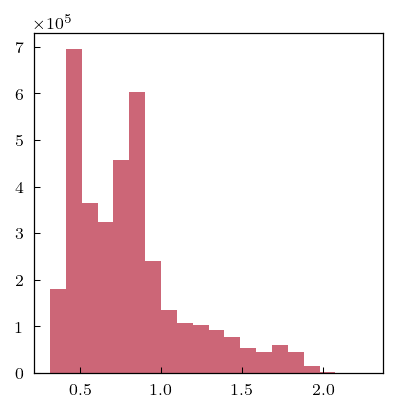

In [22]:
_  = plt.hist(np.concatenate(r226f), bins=20)

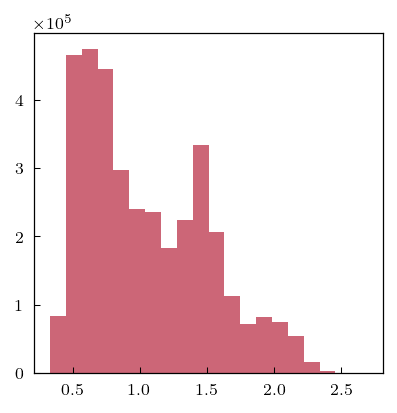

In [23]:
_  = plt.hist(np.concatenate(r229f), bins=20)

In [24]:
len(sb_trajs)

316

In [42]:
r229f_arr = np.concatenate(r229f_old)
r226f_arr = np.concatenate(r226f)
r223f_arr = np.concatenate(r223f)

In [28]:
rf161 = np.stack((r223f_arr, r226f_arr, r229f_arr), axis=-1)
traj_inds = util.split_indices(r223f)
rf161 = np.split(rf161, traj_inds)
print(len(rf161), rf161[0].shape)

297 (10000, 3)


In [36]:
np.save("../../data/raw_feat/rf161.npy", rf161[:237])
np.save("../../data/raw_feat/rf161_anton2.npy", rf161[237:])

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


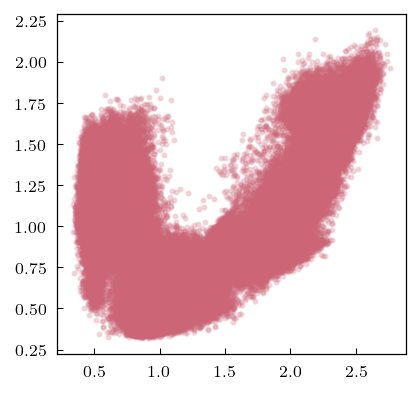

In [29]:
plt.scatter(r223f_arr[inds], r226f_arr[inds], alpha=0.2)

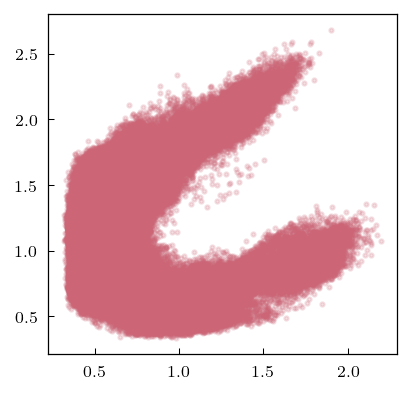

In [30]:
plt.scatter(r226f_arr[inds], r229f_arr[inds], alpha=0.2)

## committors

In [43]:
q = np.load("../../data/feat2_dist_du_anton2/q_downup_1.npy", allow_pickle=True)[6]
q_arr = np.concatenate(q)

In [44]:
N = len(q_arr)
skip = 10
random.seed(123)
inds = random.sample(range(N), N // skip)

In [46]:
rf161 = list(np.load("../../data/raw_feat/rf161.npy", allow_pickle=True))
rf161.extend(np.load("../../data/raw_feat/rf161_anton2.npy"))

In [50]:
rf161_arr = np.concatenate(rf161)
print(rf161_arr.shape)

(3790079, 3)


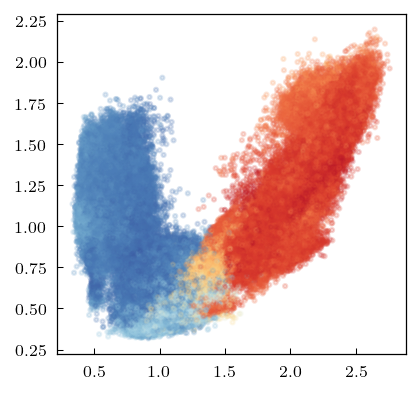

In [53]:
f = plt.figure(figsize=(3.5, 3))
plt.scatter(rf161_arr[inds, 0], rf161_arr[inds, 1], c=q_arr[inds], cmap=cm_div, alpha=0.2)

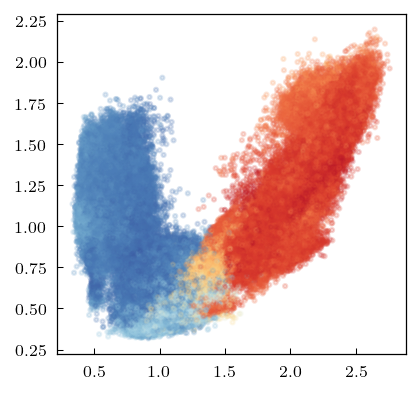

In [28]:
plt.scatter(r223f_arr[inds], r226f_arr[inds], c=q_arr[inds], cmap=cm_div, alpha=0.2)

# models

In [39]:
centroids_file = "../../models/MD-clustering-center/all.dcd"
traj = md.load(centroids_file, top="../../models/MD-clustering-center/civsd.psf")
com = md.compute_center_of_mass(traj, "residue 161 and sidechain and not name CB and not type H")

In [32]:
traj.top.select("residue 161 and sidechain and not name CB and not type H")

array([893, 894, 896, 898, 900, 902])

In [67]:
rcz = traj.atom_slice(traj.top.select(f"residue 223 226 229 and name CZ")).xyz
rcz = rcz.swapaxes(0, 1)
centroid226 = np.linalg.norm(com - rcz, axis=-1).T

In [68]:
centroid226.shape

(4, 3)

In [33]:
plt.scatter(r223f_arr[inds], r226f_arr[inds], c=q_arr[inds], cmap=cm_div, alpha=0.2)
ax = plt.gca()
plotting.plot_models(ax, centroid226[:, :2], ms=6)

IndexError: index 3573910 is out of bounds for axis 0 with size 3520052

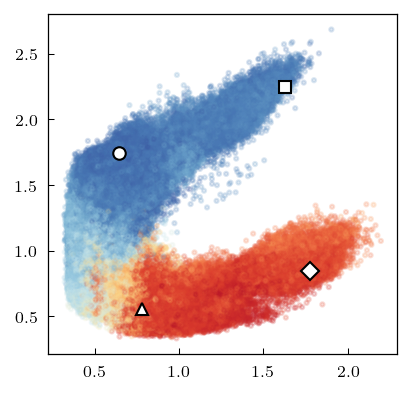

In [70]:
plt.scatter(r226f_arr[inds], r229f_arr[inds], c=q_arr[inds], cmap=cm_div, alpha=0.2)
ax = plt.gca()
plotting.plot_models(ax, centroid226[:, 1:], ms=6)

In [71]:
np.save("../../data/models_centroids_rf161.npy", centroid226)

In [54]:
centroid226 = np.load("../../data/models_centroids_rf161.npy")

In [56]:
weights = np.load("../../data/feat2_dist_du_anton2/weights_1.npy", allow_pickle=True)[0]

In [57]:
weights[0].shape

(10000,)

In [58]:
len(weights)

289

Text(0, 0.5, 'R226 - F161 distance / nm')

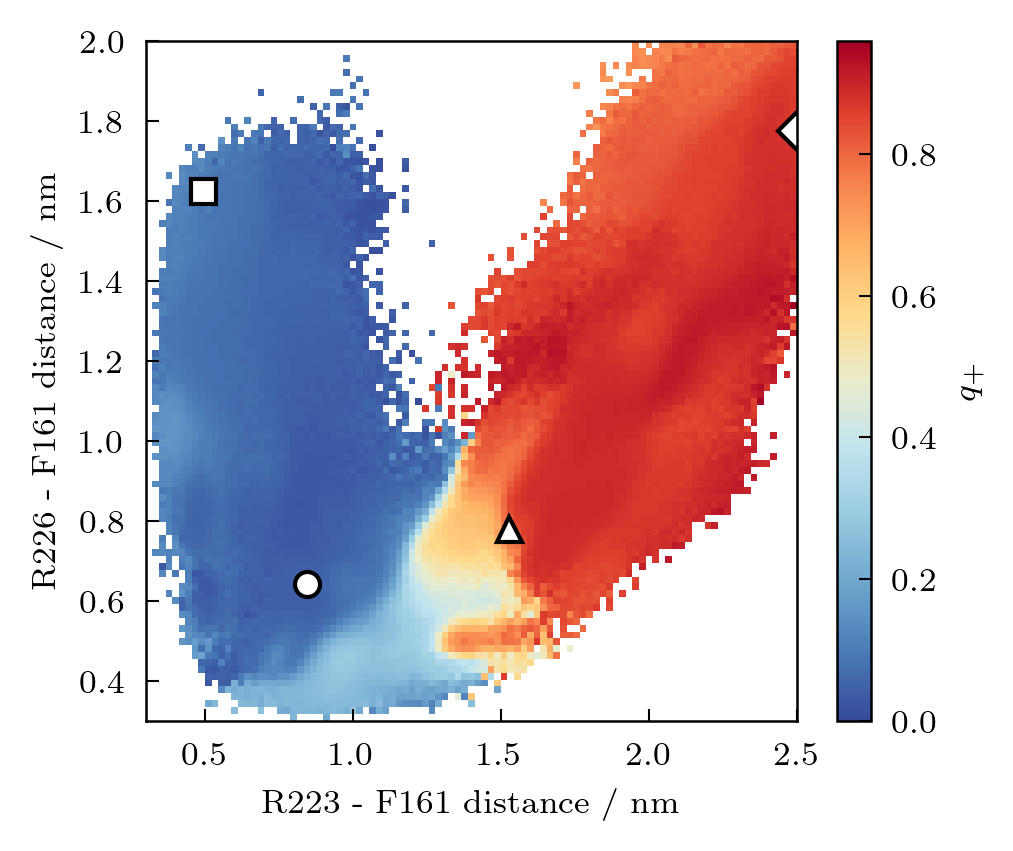

In [70]:
f = plt.figure(figsize=(3.5, 3), dpi=300)
f223 = [t[:, 0] for t in rf161[:289]]
f226 = [t[:, 1] for t in rf161[:289]]
f229 = [t[:, 2] for t in rf161[:289]]
xe = np.linspace(0.3, 2.5, 100)
ye = np.linspace(0.3, 2.0, 100)
h = extq.projection.average2d(f223, f226, q, weights, xe, ye)
plt.pcolormesh(xe, ye, h.T, cmap=cm_div)
ax = plt.gca()
plotting.plot_models(ax, centroid226[:, :-1], ms=6)
cb = plt.colorbar(label="$q_+$")
plt.xlabel("R223 - F161 distance / nm")
plt.ylabel("R226 - F161 distance / nm")

/project/dinner/scguo/extq/src/extq/projection.py:140: RuntimeWarning: invalid value encountered in true_divide
  return numer / denom


Text(0, 0.5, 'R229 - F161 distance / nm')

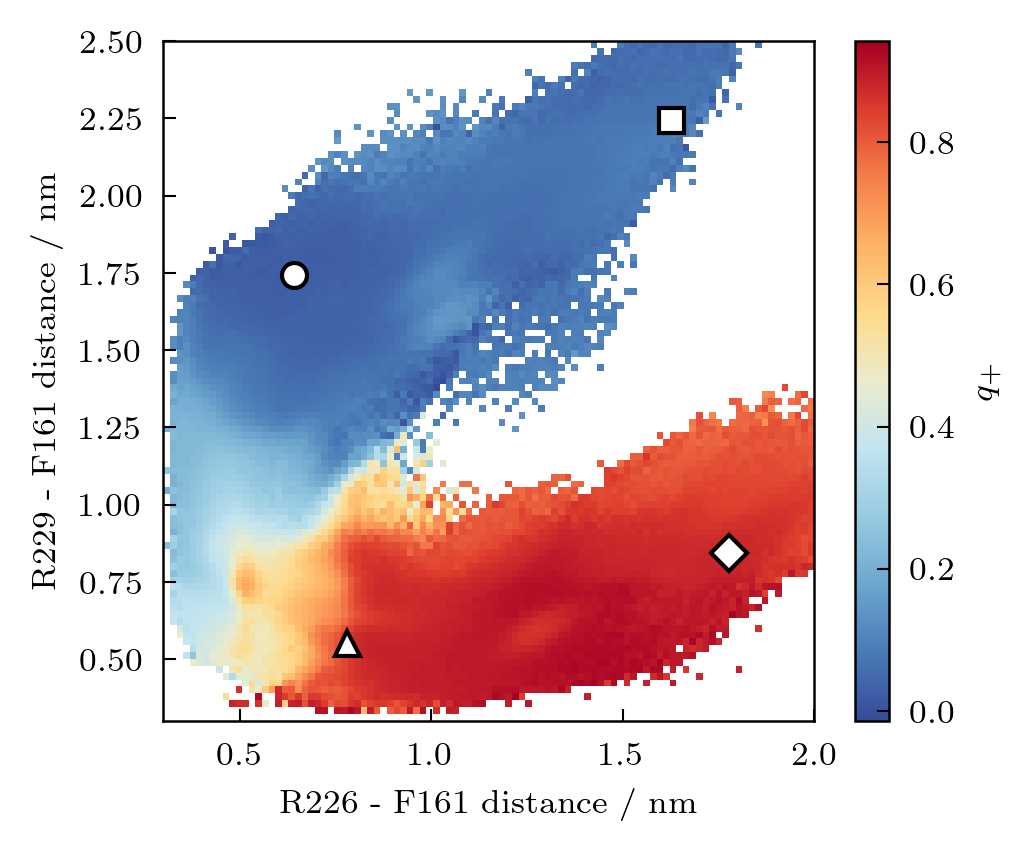

In [71]:
f = plt.figure(figsize=(3.5, 3), dpi=300)
xe = np.linspace(0.3, 2.0, 100)
ye = np.linspace(0.3, 2.5, 100)
h = extq.projection.average2d(f226, f229, q, weights, xe, ye)
plt.pcolormesh(xe, ye, h.T, cmap=cm_div)
ax = plt.gca()
plotting.plot_models(ax, centroid226[:, 1:], ms=6)
cb = plt.colorbar(label="$q_+$")
plt.xlabel("R226 - F161 distance / nm")
plt.ylabel("R229 - F161 distance / nm")